# Aneleise Peppard

## Research question/interests

The research question that I am interested in is whether the location of a school/what school district it is in has an impact on students' completion rates in secondary school. I am also interested in posing the question of whether the population size of the city in which a school is located has a relationship with the proportion of students receiving their high school diploma.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
myData = pd.read_csv("../data/raw/Completion_Rate_residents_only_97-21.csv")
myData

,YEAR_6_OF_COHORT,DATA_LEVEL,SUB_POPULATION,PUBLIC_OR_INDEPENDENT,DISTRICT_NUMBER,DISTRICT_NAME,FACILITY_TYPE,COMPLETION_RATE_MODEL,MODEL_TYPE,COHORT_COUNT,SUCCESS_COUNT,ESTIMATED_OUTMIGRANTS,ESTIMATED_COMPLETION_RATE
0,1997/1998,PROVINCE LEVEL,ALL STUDENTS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,50298,34014,5157.609,75.352
1,1997/1998,PROVINCE LEVEL,INDIGENOUS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,3725,1284,451.518,39.224
2,1997/1998,PROVINCE LEVEL,NON INDIGENOUS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,46573,32730,4706.091,78.176
3,1997/1998,PROVINCE LEVEL,SPECIAL NEEDS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,915,210,111.229,26.127
4,1997/1998,PROVINCE LEVEL,NON SPECIAL NEEDS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,49383,33804,5046.381,76.244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55591,2020/2021,DISTRICT LEVEL,ALL STUDENTS,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,ALL FACILITY TYPES,GRAD_5_YEAR SUB_MODEL,STATIC MODEL,217,185,35.196,100
55592,2020/2021,DISTRICT LEVEL,INDIGENOUS,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,ALL FACILITY TYPES,GRAD_5_YEAR SUB_MODEL,STATIC MODEL,24,20,3.312,96.677
55593,2020/2021,DISTRICT LEVEL,NON INDIGENOUS,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,ALL FACILITY TYPES,GRAD_5_YEAR SUB_MODEL,STATIC MODEL,193,165,31.884,100
55594,2020/2021,DISTRICT LEVEL,SPECIAL NEEDS,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,ALL FACILITY TYPES,GRAD_5_YEAR SUB_MODEL,STATIC MODEL,45,41,6.97,100


This is my raw data.

In [3]:
myData.shape

(55596, 13)

This shows the number of rows and columns in my dataset.

In [4]:
myData.head()

,YEAR_6_OF_COHORT,DATA_LEVEL,SUB_POPULATION,PUBLIC_OR_INDEPENDENT,DISTRICT_NUMBER,DISTRICT_NAME,FACILITY_TYPE,COMPLETION_RATE_MODEL,MODEL_TYPE,COHORT_COUNT,SUCCESS_COUNT,ESTIMATED_OUTMIGRANTS,ESTIMATED_COMPLETION_RATE
0,1997/1998,PROVINCE LEVEL,ALL STUDENTS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,50298,34014,5157.609,75.352
1,1997/1998,PROVINCE LEVEL,INDIGENOUS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,3725,1284,451.518,39.224
2,1997/1998,PROVINCE LEVEL,NON INDIGENOUS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,46573,32730,4706.091,78.176
3,1997/1998,PROVINCE LEVEL,SPECIAL NEEDS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,915,210,111.229,26.127
4,1997/1998,PROVINCE LEVEL,NON SPECIAL NEEDS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,49383,33804,5046.381,76.244


This shows the column names and the first four rows of my dataset. 

In [5]:
myData.describe()

,DISTRICT_NUMBER
count,52941.000000
mean,52.947904
std,22.915634
min,5.000000
25%,37.000000
50%,52.000000
75%,71.000000
max,93.000000


This doesn't give me any relevant information for my research question. 

In [6]:
list(myData.columns)

['YEAR_6_OF_COHORT',
 'DATA_LEVEL',
 'SUB_POPULATION',
 'PUBLIC_OR_INDEPENDENT',
 'DISTRICT_NUMBER',
 'DISTRICT_NAME',
 'FACILITY_TYPE',
 'COMPLETION_RATE_MODEL',
 'MODEL_TYPE',
 'COHORT_COUNT',
 'SUCCESS_COUNT',
 'ESTIMATED_OUTMIGRANTS',
 'ESTIMATED_COMPLETION_RATE']

This shows all of the column names. I will use this to determine which rows I need for my research question and which ones I can drop. 

In [7]:
myData.nunique()

YEAR_6_OF_COHORT                24
DATA_LEVEL                       2
SUB_POPULATION                   5
PUBLIC_OR_INDEPENDENT            3
DISTRICT_NUMBER                 60
DISTRICT_NAME                   60
FACILITY_TYPE                    1
COMPLETION_RATE_MODEL            8
MODEL_TYPE                       2
COHORT_COUNT                  4908
SUCCESS_COUNT                 4928
ESTIMATED_OUTMIGRANTS        34589
ESTIMATED_COMPLETION_RATE    27168
dtype: int64

This is helpful to see how many unique values are under each of the columns. 

In [8]:
myData["YEAR_6_OF_COHORT"].unique()

array(['1997/1998', '1998/1999', '1999/2000', '2000/2001', '2001/2002',
       '2002/2003', '2003/2004', '2004/2005', '2005/2006', '2006/2007',
       '2007/2008', '2008/2009', '2009/2010', '2010/2011', '2011/2012',
       '2012/2013', '2013/2014', '2014/2015', '2015/2016', '2016/2017',
       '2017/2018', '2018/2019', '2019/2020', '2020/2021'], dtype=object)

This is an important column for my exploratory data analysis because I will need it to compare the completion rates in each of the districts throughout time. 

In [9]:
myData["DATA_LEVEL"].unique()

array(['PROVINCE LEVEL', 'DISTRICT LEVEL'], dtype=object)

Only the District Level column relates to my research question. I can drop the Province Level column.

In [10]:
myData["SUB_POPULATION"].unique()

array(['ALL STUDENTS', 'INDIGENOUS', 'NON INDIGENOUS', 'SPECIAL NEEDS',
       'NON SPECIAL NEEDS'], dtype=object)

Only "ALL STUDENTS" is relevant to my research question. I can drop all of the other rows.

In [11]:
myData["PUBLIC_OR_INDEPENDENT"].unique()

array(['PROVINCE-TOTAL', 'BC PUBLIC SCHOOL', 'BC INDEPENDENT SCHOOL'],
      dtype=object)

This is not relevant to my research question. I can drop this column.

In [12]:
myData["DISTRICT_NUMBER"].unique()

array([nan,  5.,  6.,  8., 10., 19., 20., 22., 23., 27., 28., 33., 34.,
       35., 36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47.,
       48., 49., 50., 51., 52., 53., 54., 57., 58., 59., 60., 61., 62.,
       63., 64., 67., 68., 69., 70., 71., 72., 73., 74., 75., 78., 79.,
       81., 82., 83., 84., 85., 87., 91., 92., 93.])

"nan" will need to be dropped. Since district numbers relate directly to the district names, I can drop this whole column.

In [13]:
myData["DISTRICT_NAME"].unique()

array([nan, 'Southeast Kootenay', 'Rocky Mountain', 'Kootenay Lake',
       'Arrow Lakes', 'Revelstoke', 'Kootenay-Columbia', 'Vernon',
       'Central Okanagan', 'Cariboo-Chilcotin', 'Quesnel', 'Chilliwack',
       'Abbotsford', 'Langley', 'Surrey', 'Delta', 'Richmond',
       'Vancouver', 'New Westminster', 'Burnaby',
       'Maple Ridge-Pitt Meadows', 'Coquitlam', 'North Vancouver',
       'West Vancouver', 'Sunshine Coast', 'Powell River', 'Sea to Sky',
       'Central Coast', 'Haida Gwaii', 'Boundary', 'Prince Rupert',
       'Okanagan Similkameen', 'Bulkley Valley', 'Prince George',
       'Nicola-Similkameen', 'Peace River South', 'Peace River North',
       'Greater Victoria', 'Sooke', 'Saanich', 'Gulf Islands',
       'Okanagan Skaha', 'Nanaimo-Ladysmith', 'Qualicum', 'Pacific Rim',
       'Comox Valley', 'Campbell River', 'Kamloops-Thompson',
       'Gold Trail', 'Mission', 'Fraser-Cascade', 'Cowichan Valley',
       'Fort Nelson', 'Coast Mountains', 'North Okanagan-Shuswap',

"nan" will have to be dropped. It may be useful to merge in another dataset that includes the population of each region and sort them by population size.

In [14]:
myData["FACILITY_TYPE"].unique()

array(['ALL FACILITY TYPES'], dtype=object)

In [15]:
myData["COMPLETION_RATE_MODEL"].unique()

array(['GRAD_7_YEAR EXTENDED_MODEL', 'GRAD_8_YEAR EXTENDED_MODEL',
       'SIX YEAR DOGWOOD COMPLETION RATE', 'PROG_2_YEAR SUB_MODEL',
       'PROG_3_YEAR SUB_MODEL', 'PROG_4_YEAR SUB_MODEL',
       'PROG_5_YEAR SUB_MODEL', 'GRAD_5_YEAR SUB_MODEL'], dtype=object)

In [16]:
myData["MODEL_TYPE"].unique()

array(['DYNAMIC MODEL', 'STATIC MODEL'], dtype=object)

In [17]:
myData["COHORT_COUNT"].unique()

array(['50298', '3725', '46573', ..., '1935', '2618', '2481'],
      dtype=object)

In [18]:
myData["SUCCESS_COUNT"].unique()

array(['34014', '1284', '32730', ..., '3293', '2214', '2130'],
      dtype=object)

In [19]:
myData["ESTIMATED_OUTMIGRANTS"].unique()

array(['5157.609', '451.518', '4706.091', ..., '23.211', '35.196',
       '28.226'], dtype=object)

In [20]:
myData["ESTIMATED_COMPLETION_RATE"].unique()

array(['75.352', '39.224', '78.176', ..., '66.552', '45.087', '57.434'],
      dtype=object)

Below, I will remove all the columns to my research question. These include: 
'PUBLIC_OR_INDEPENDENT', 
'DISTRICT_NUMBER', 
'FACILITY_TYPE', 
'MODEL_TYPE', 
'COHORT_COUNT', 
'SUCCESS_COUNT', and
'ESTIMATED_OUTMIGRANTS'

In [21]:
myData = myData.drop("PUBLIC_OR_INDEPENDENT", axis = 1)
myData = myData.drop("DISTRICT_NUMBER", axis = 1)
myData = myData.drop("FACILITY_TYPE", axis = 1)
myData = myData.drop("MODEL_TYPE", axis = 1)
myData = myData.drop("COHORT_COUNT", axis = 1)
myData = myData.drop("SUCCESS_COUNT", axis = 1)
myData = myData.drop("ESTIMATED_OUTMIGRANTS", axis = 1)
myData



,YEAR_6_OF_COHORT,DATA_LEVEL,SUB_POPULATION,DISTRICT_NAME,COMPLETION_RATE_MODEL,ESTIMATED_COMPLETION_RATE
0,1997/1998,PROVINCE LEVEL,ALL STUDENTS,NaN,GRAD_7_YEAR EXTENDED_MODEL,75.352
1,1997/1998,PROVINCE LEVEL,INDIGENOUS,NaN,GRAD_7_YEAR EXTENDED_MODEL,39.224
2,1997/1998,PROVINCE LEVEL,NON INDIGENOUS,NaN,GRAD_7_YEAR EXTENDED_MODEL,78.176
3,1997/1998,PROVINCE LEVEL,SPECIAL NEEDS,NaN,GRAD_7_YEAR EXTENDED_MODEL,26.127
4,1997/1998,PROVINCE LEVEL,NON SPECIAL NEEDS,NaN,GRAD_7_YEAR EXTENDED_MODEL,76.244
...,...,...,...,...,...,...
55591,2020/2021,DISTRICT LEVEL,ALL STUDENTS,Conseil scolaire francophone,GRAD_5_YEAR SUB_MODEL,100
55592,2020/2021,DISTRICT LEVEL,INDIGENOUS,Conseil scolaire francophone,GRAD_5_YEAR SUB_MODEL,96.677
55593,2020/2021,DISTRICT LEVEL,NON INDIGENOUS,Conseil scolaire francophone,GRAD_5_YEAR SUB_MODEL,100
55594,2020/2021,DISTRICT LEVEL,SPECIAL NEEDS,Conseil scolaire francophone,GRAD_5_YEAR SUB_MODEL,100


Below, I will remove rows that are not relevant to my research question including:
rows with anything except for "DISTRICT LEVEL" in the "DATA_LEVEL" column,
rows with anything except for "ALL STUDENTS" in the "SUB_POPULATION" column,
rows with "NaN" data in the "DISTRICT_NAME" column, and
rows with anything except for "SIX YEAR DOGWOOD COMPLETION RATE" in the "COMPLETION_RATE_MODEL" column

In [22]:
myData = myData[myData['DATA_LEVEL'].str.contains('DISTRICT LEVEL')==True]
myData = myData[myData['SUB_POPULATION'].str.contains('ALL STUDENTS')==True]
myData = myData.dropna(axis=0)
myData = myData[myData['COMPLETION_RATE_MODEL'].str.contains('SIX YEAR DOGWOOD COMPLETION RATE')==True]
myData = myData[myData['ESTIMATED_COMPLETION_RATE'].str.contains('Msk')==False]
myData

,YEAR_6_OF_COHORT,DATA_LEVEL,SUB_POPULATION,DISTRICT_NAME,COMPLETION_RATE_MODEL,ESTIMATED_COMPLETION_RATE
1255,1999/2000,DISTRICT LEVEL,ALL STUDENTS,Southeast Kootenay,SIX YEAR DOGWOOD COMPLETION RATE,85.704
1260,1999/2000,DISTRICT LEVEL,ALL STUDENTS,Rocky Mountain,SIX YEAR DOGWOOD COMPLETION RATE,74.781
1265,1999/2000,DISTRICT LEVEL,ALL STUDENTS,Kootenay Lake,SIX YEAR DOGWOOD COMPLETION RATE,79.971
1270,1999/2000,DISTRICT LEVEL,ALL STUDENTS,Arrow Lakes,SIX YEAR DOGWOOD COMPLETION RATE,77.344
1275,1999/2000,DISTRICT LEVEL,ALL STUDENTS,Revelstoke,SIX YEAR DOGWOOD COMPLETION RATE,75.764
...,...,...,...,...,...,...
53997,2020/2021,DISTRICT LEVEL,ALL STUDENTS,Vancouver Island West,SIX YEAR DOGWOOD COMPLETION RATE,57.807
54002,2020/2021,DISTRICT LEVEL,ALL STUDENTS,Vancouver Island North,SIX YEAR DOGWOOD COMPLETION RATE,68.604
54012,2020/2021,DISTRICT LEVEL,ALL STUDENTS,Nechako Lakes,SIX YEAR DOGWOOD COMPLETION RATE,71.731
54017,2020/2021,DISTRICT LEVEL,ALL STUDENTS,Nisga'a,SIX YEAR DOGWOOD COMPLETION RATE,62.228


Below, I will sort the "DISTRICT_NAME" column by alphabetical order.
I should probably merge in another dataset that sorts this column by population size.

In [23]:
myData = myData.sort_values(by=['DISTRICT_NAME'], ascending=True)
myData

,YEAR_6_OF_COHORT,DATA_LEVEL,SUB_POPULATION,DISTRICT_NAME,COMPLETION_RATE_MODEL,ESTIMATED_COMPLETION_RATE
34018,2012/2013,DISTRICT LEVEL,ALL STUDENTS,Abbotsford,SIX YEAR DOGWOOD COMPLETION RATE,92.738
46572,2017/2018,DISTRICT LEVEL,ALL STUDENTS,Abbotsford,SIX YEAR DOGWOOD COMPLETION RATE,90.305
13894,2004/2005,DISTRICT LEVEL,ALL STUDENTS,Abbotsford,SIX YEAR DOGWOOD COMPLETION RATE,81.531
3823,2000/2001,DISTRICT LEVEL,ALL STUDENTS,Abbotsford,SIX YEAR DOGWOOD COMPLETION RATE,77.97
44064,2016/2017,DISTRICT LEVEL,ALL STUDENTS,Abbotsford,SIX YEAR DOGWOOD COMPLETION RATE,89.834
...,...,...,...,...,...,...
3878,2000/2001,DISTRICT LEVEL,ALL STUDENTS,West Vancouver,SIX YEAR DOGWOOD COMPLETION RATE,95.632
53837,2020/2021,DISTRICT LEVEL,ALL STUDENTS,West Vancouver,SIX YEAR DOGWOOD COMPLETION RATE,100
36583,2013/2014,DISTRICT LEVEL,ALL STUDENTS,West Vancouver,SIX YEAR DOGWOOD COMPLETION RATE,100
39095,2014/2015,DISTRICT LEVEL,ALL STUDENTS,West Vancouver,SIX YEAR DOGWOOD COMPLETION RATE,100


In [24]:
if len(myData[myData.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(myData[myData.duplicated()]))
    print(myData[myData.duplicated(keep=False)].sort_values(by=list(myData.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


In order to compare the districts, I will merge in another dataset from the government of BC that shows the population of all school districts available. 

In [25]:
myData = myData.rename(columns = {"DISTRICT_NAME" : "School District"})
myData = myData.rename(columns =  {"YEAR_6_OF_COHORT" : "Year"})
myData = myData.rename(columns =  {"ESTIMATED_COMPLETION_RATE" : "Estimated Completion Rate"})
myData = myData.drop("DATA_LEVEL", axis = 1)
myData = myData.drop("SUB_POPULATION", axis = 1)
myData = myData.drop("COMPLETION_RATE_MODEL", axis = 1)
myData

,Year,School District,Estimated Completion Rate
34018,2012/2013,Abbotsford,92.738
46572,2017/2018,Abbotsford,90.305
13894,2004/2005,Abbotsford,81.531
3823,2000/2001,Abbotsford,77.97
44064,2016/2017,Abbotsford,89.834
...,...,...,...
3878,2000/2001,West Vancouver,95.632
53837,2020/2021,West Vancouver,100
36583,2013/2014,West Vancouver,100
39095,2014/2015,West Vancouver,100


In [26]:
myData["Year"] = myData["Year"].str.slice(0,-5)
myData

,Year,School District,Estimated Completion Rate
34018,2012,Abbotsford,92.738
46572,2017,Abbotsford,90.305
13894,2004,Abbotsford,81.531
3823,2000,Abbotsford,77.97
44064,2016,Abbotsford,89.834
...,...,...,...
3878,2000,West Vancouver,95.632
53837,2020,West Vancouver,100
36583,2013,West Vancouver,100
39095,2014,West Vancouver,100


In [27]:
popData = pd.read_csv("../data/raw/Population.csv")
popData

,Region,School District,Year,Gender,Total
0,5,Southeast Kootenay,1997,T,40656
1,6,Rocky Mountain,1997,T,24963
2,8,Kootenay Lake,1997,T,41417
3,10,Arrow Lakes,1997,T,5243
4,19,Revelstoke,1997,T,8830
...,...,...,...,...,...
1470,84,Vancouver Island West,2021,T,2327
1471,85,Vancouver Island North,2021,T,11799
1472,87,Stikine,2021,T,2094
1473,91,Nechako Lakes,2021,T,23460


In [28]:
popData = popData.drop("Region", axis = 1)
popData = popData.drop("Gender", axis = 1)
popData = popData.rename(columns = {"Total" : "Population"})
popData = popData.dropna(axis=0)
popData

,School District,Year,Population
0,Southeast Kootenay,1997,40656
1,Rocky Mountain,1997,24963
2,Kootenay Lake,1997,41417
3,Arrow Lakes,1997,5243
4,Revelstoke,1997,8830
...,...,...,...
1470,Vancouver Island West,2021,2327
1471,Vancouver Island North,2021,11799
1472,Stikine,2021,2094
1473,Nechako Lakes,2021,23460


In [29]:
#mypopData = pd.concat([myData, popData], keys = ["Year", "School District", "Population"], join = "", ignore_index = True)
#mypopData = pd.merge([myData, popData], how = 'inner')
#mypopData = pd.concat([myData, popData], axis=1, join="inner")
#mypopData = pd.concat([myData, popData], axis=1).reindex(myData.index)
#mypopData = pd.merge(myData, popData, on=["Year", "School District"])

#convert year variable in df2 to integer
myData["Year"] = myData["Year"].astype(int)
mypopData = pd.merge(myData, popData, how = "inner")
mypopData

,Year,School District,Estimated Completion Rate,Population
0,2012,Abbotsford,92.738,139733
1,2017,Abbotsford,90.305,151675
2,2004,Abbotsford,81.531,128808
3,2000,Abbotsford,77.97,120655
4,2016,Abbotsford,89.834,147982
...,...,...,...,...
1093,2000,West Vancouver,95.632,50101
1094,2020,West Vancouver,100,52489
1095,2013,West Vancouver,100,51652
1096,2014,West Vancouver,100,52310


In [30]:
mypopData = mypopData.sort_values(by=['Population'], ascending=False)
mypopData["Population"] = mypopData["Population"].astype(int)
mypopData["Estimated Completion Rate"] = mypopData["Estimated Completion Rate"].astype(float)
mypopData

,Year,School District,Estimated Completion Rate,Population
992,2020,Vancouver,91.024,716827
1010,2019,Vancouver,90.990,711708
1001,2018,Vancouver,91.839,697376
1008,2017,Vancouver,91.511,688495
995,2016,Vancouver,89.906,679567
...,...,...,...,...
568,2008,Nisga'a,61.777,1928
562,2020,Nisga'a,62.228,1917
559,2018,Nisga'a,56.090,1892
557,2011,Nisga'a,34.912,1891


In [31]:
cleanData = mypopData

In [32]:
cleanData = cleanData.groupby('School District').mean()
cleanData = cleanData.sort_values(by=['Population'], ascending=False)
cleanData = cleanData.drop("Year", axis = 1)
cleanData



,Estimated Completion Rate,Population
School District,,
Vancouver,84.822409,635383.863636
Surrey,85.011909,483813.136364
Burnaby,86.506227,225039.681818
Greater Victoria,80.585773,223584.500000
Coquitlam,90.882636,222578.545455
Richmond,92.609955,192277.409091
Central Okanagan,84.455045,181213.545455
North Vancouver,88.899682,139308.818182
Abbotsford,86.350364,137431.772727


<AxesSubplot: xlabel='Estimated Completion Rate', ylabel='Population'>

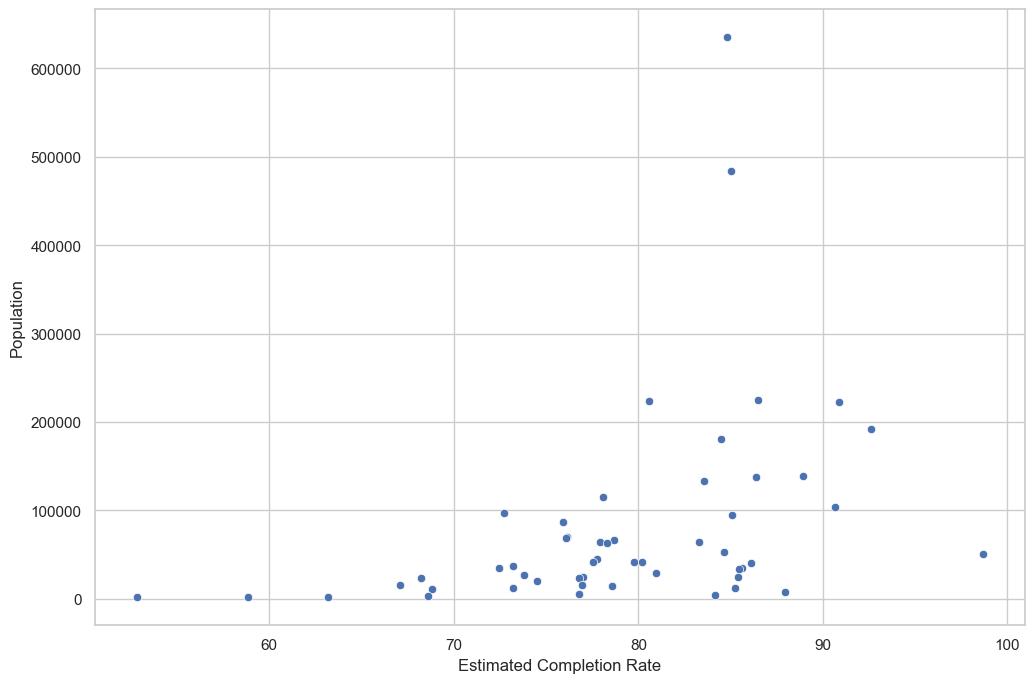

In [33]:
plt.figure(figsize = (12,8))
sns.set_theme(style="whitegrid")
sns.scatterplot(x = 'Estimated Completion Rate', y = 'Population', data = cleanData)
#sns.countplot(data = cleanData, y = 'Estimated Completion Rate', palette = 'dark').set(title = 'Title', xlabel = 'Estimated Completion Rate', ylabel = '')

In [34]:
##sns.lmplot(x="Estimated Completion Rate", y="Population", col="Estimated Completion Rate", hue="Population", data=cleanData,
              ## palette='pastel', y_jitter=.02, logistic=True, truncate=False)

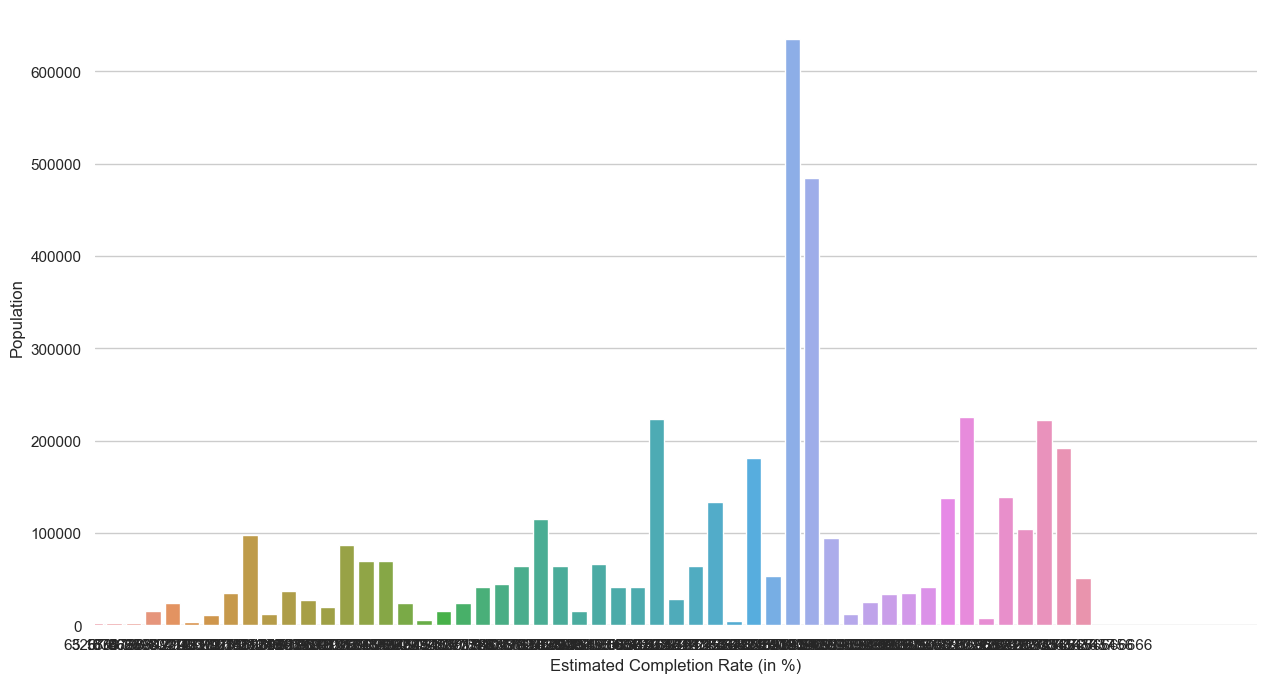

In [35]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 8))
sns.set_color_codes("pastel")
sns.barplot(data=cleanData, x="Estimated Completion Rate", y = "Population")
ax.set(xlim=(0, 60), ylim=(0), ylabel="Population",
       xlabel="Estimated Completion Rate (in %)")
sns.despine(left=True, bottom=True)
#plt.setp(f.axes, xticks=[])

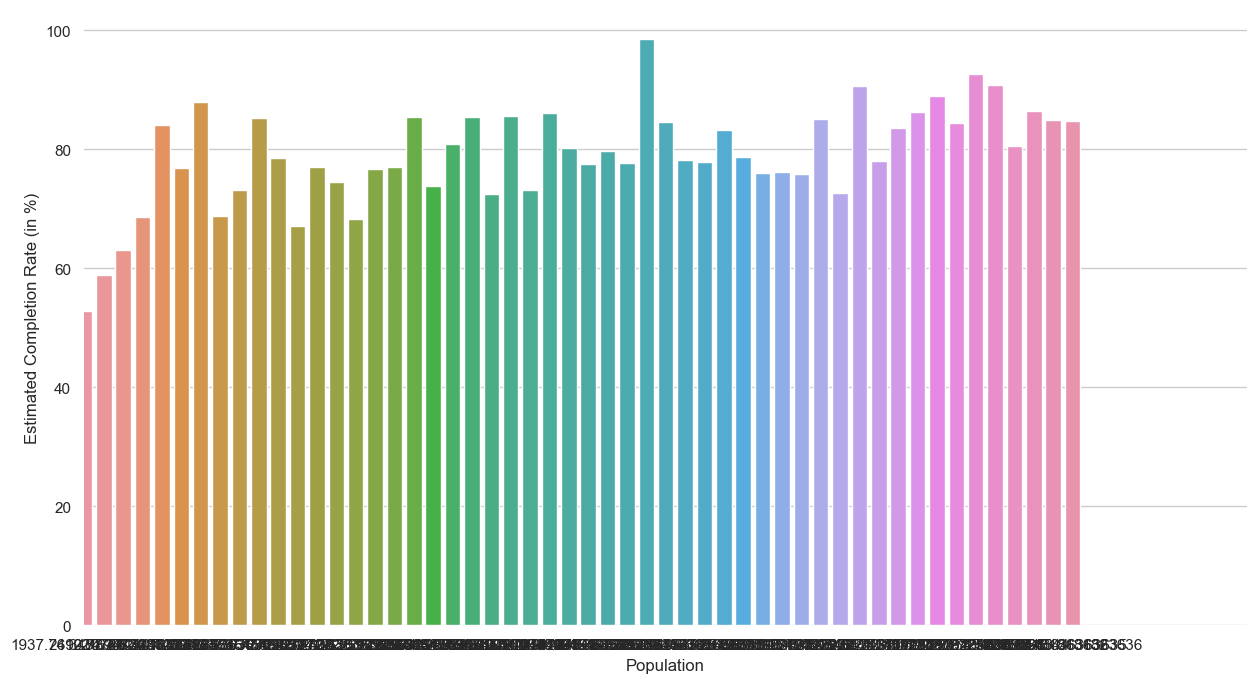

In [36]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 8))
sns.set_color_codes("pastel")
sns.barplot(data=cleanData, x="Population", y = "Estimated Completion Rate")
ax.set(xlim=(0, 60), ylabel="Estimated Completion Rate (in %)",
       xlabel="Population")
sns.despine(left=True, bottom=True)

<AxesSubplot: xlabel='Estimated Completion Rate', ylabel='Population'>

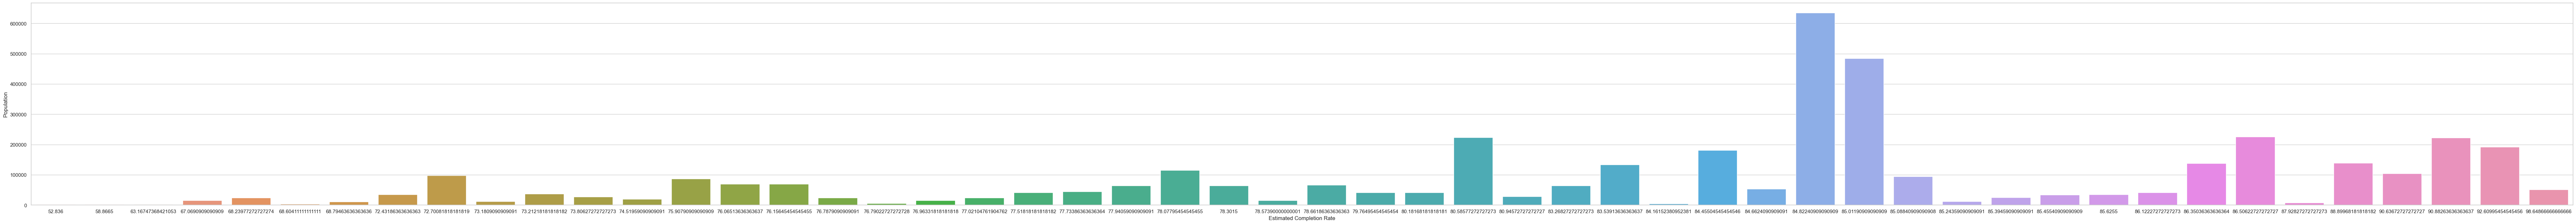

In [37]:
plt.figure(figsize = (100,8))
sns.set_theme(style="whitegrid")
sns.barplot(x = 'Estimated Completion Rate', y = 'Population', data = cleanData)

StopIteration: 

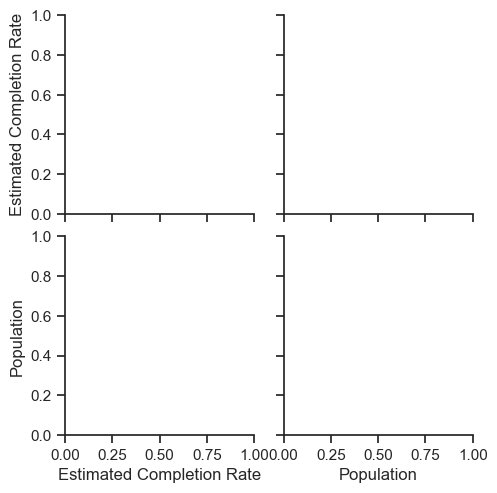

In [38]:
sns.set_theme(style="ticks")
sns.pairplot(cleanData)

In [ ]:
sns.set_theme(style="white")

sns.relplot(x="Population", y="Estimated Completion Rate", hue="School District", 
            sizes=(40, 400), alpha=1, palette="bright",height=10, data=cleanData)

In [ ]:
# myData = myData.drop("PUBLIC_OR_INDEPENDENT", axis = 1)
# myData = myData.drop("DISTRICT_NUMBER", axis = 1)
# myData = myData.drop("FACILITY_TYPE", axis = 1)
# myData = myData.drop("MODEL_TYPE", axis = 1)
# myData = myData.drop("COHORT_COUNT", axis = 1)
# myData = myData.drop("SUCCESS_COUNT", axis = 1)
# myData = myData.drop("ESTIMATED_OUTMIGRANTS", axis = 1)

# myData = myData[myData['DATA_LEVEL'].str.contains('DISTRICT LEVEL')==True]
# myData = myData[myData['SUB_POPULATION'].str.contains('ALL STUDENTS')==True]
# myData = myData[myData['DISTRICT_NAME'].str.contains('NaN')==False]
# myData = myData[myData['COMPLETION_RATE_MODEL'].str.contains('SIX YEAR DOGWOOD COMPLETION RATE')==True]
# myData = myData[myData['ESTIMATED_COMPLETION_RATE'].str.contains('Msk')==False]

# myData = myData.sort_values(by=['DISTRICT_NAME'], ascending=True)

# myData = myData.rename(columns = {"DISTRICT_NAME" : "School District"})
# myData = myData.rename(columns =  {"YEAR_6_OF_COHORT" : "Year"})
# myData = myData.rename(columns =  {"ESTIMATED_COMPLETION_RATE" : "Estimated Completion Rate"})
# myData = myData.drop("DATA_LEVEL", axis = 1)
# myData = myData.drop("SUB_POPULATION", axis = 1)
# myData = myData.drop("COMPLETION_RATE_MODEL", axis = 1)

# myData["Year"] = myData["Year"].str.slice(0,-5)



popData = pd.read_csv("../data/raw/Population.csv")

popData = popData.drop("Region", axis = 1)
popData = popData.drop("Gender", axis = 1)
popData = popData.rename(columns = {"Total" : "Population"})
popData = popData.dropna(axis=0)

# myData["Year"] = myData["Year"].astype(int)
mypopData = pd.merge(myData, popData, how = "inner")

mypopData = mypopData.sort_values(by=['Population'], ascending=False)
mypopData["Population"] = mypopData["Population"].astype(int)
mypopData["Estimated Completion Rate"] = mypopData["Estimated Completion Rate"].astype(float)



cleanData = mypopData

cleanData = cleanData.groupby('School District').mean()
cleanData = cleanData.sort_values(by=['Population'], ascending=False)
cleanData = cleanData.drop("Year", axis = 1)

# Task 3 - 

In [1]:
import project_function2 as funk

clean_df = funk.load_and_process("../data/raw/Completion_Rate_residents_only_97-21.csv")
clean_df

,Year,School District,Estimated Completion Rate
40925,2014,Abbotsford,77.274
17045,2005,Abbotsford,93.92
17046,2005,Abbotsford,99.72
32134,2011,Abbotsford,100
32135,2011,Abbotsford,99.44
...,...,...,...
19299,2006,West Vancouver,100
19296,2006,West Vancouver,100
18985,2006,West Vancouver,98.466
18984,2006,West Vancouver,99.088
